# Part 1: 보스턴 주택가격 데이터 분석하기

In [75]:
from sklearn.linear_model import LinearRegression 
from  sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd  
import seaborn as sns

### Q1 다음과 같은 데이터 전처리를 시행하라.

1. 제공된 boston_csv.csv 파일을 사용하여 pandas 데이터 프레임 객체를 만든다, 결측치 코드인 na와 NaN이 모두 실제 결측치로 되도록 한다.

In [77]:
boston_df = pd.read_csv('boston_csv.csv')
boston_df = boston_df.apply(pd.to_numeric, errors='coerce')
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT. MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,NaN,4.0900,1,296,15.3,396.90,4.98,24.0,0
1,0.02731,0.0,7.07,0,NaN,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4,0
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6,0
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9,0
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0,0


2. 이와 같은 결측치가 있는 관측치를 모두 제거한다.

In [103]:
boston_df[boston_df.isna().any(axis=1)] 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT. MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,NaN,4.0900,1,296,15.3,396.9,4.98,24.0,0
1,0.02731,0.0,7.07,0,NaN,6.421,78.9,4.9671,2,242,17.8,396.9,9.14,21.6,0
500,0.22438,0.0,9.69,0,0.585,6.027,79.7,2.4982,6,391,19.2,NaN,14.33,16.8,0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,396.9,NaN,11.9,0


In [81]:
boston_df.dropna() # rows deleted

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT. MEDV
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,1
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7,0
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,0.17783,0.0,9.69,0,0.585,5.569,73.5,2.3999,6,391,19.2,395.77,15.10,17.5,0
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4,0
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6,0
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9,0


### Q2 다음과 같은 요약 통계를 구하라.


1. describe 메소드를 적용해서 각 변수병 요약 통계를 구한다.

In [83]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT. MEDV
count,506.000000,506.000000,506.000000,506.000000,505.000000,506.000000,505.000000,506.000000,506.000000,506.000000,506.000000,505.000000,505.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554865,6.284634,68.581584,3.795043,9.549407,408.237154,18.455534,356.594376,12.662515,22.532806,0.166008
std,8.601545,23.322453,6.860353,0.253994,0.115930,0.702617,28.176371,2.105710,8.707259,168.537116,2.164946,91.367787,7.144974,9.197104,0.372456
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000,0.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.000000,2.100175,4.000000,279.000000,17.400000,375.330000,6.930000,17.025000,0.000000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.700000,3.207450,5.000000,330.000000,19.050000,391.430000,11.380000,21.200000,0.000000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.100000,5.188425,24.000000,666.000000,20.200000,396.210000,16.960000,25.000000,0.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000,1.000000


2. 상관관계를 구한후 seaborn 라이브러리의 heatmap 을 구현한다.

In [85]:
# 1) 상관관계 행렬 계산
correlation_matrix = boston_df.corr()
correlation_matrix

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT. MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420661,-0.219247,0.352701,-0.379670,0.625505,0.582764,0.289946,-0.384853,0.455351,-0.388305,-0.151987
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.517721,0.311991,-0.569524,0.664408,-0.311948,-0.314563,-0.391679,0.176022,-0.413922,0.360445,0.365296
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763462,-0.391676,0.645543,-0.708027,0.595129,0.720760,0.383248,-0.356877,0.604229,-0.483725,-0.366276
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.090859,0.091251,0.086461,-0.099176,-0.007368,-0.035587,-0.121515,0.049040,-0.054319,0.175260,0.108631
NOX,0.420661,-0.517721,0.763462,0.090859,1.000000,-0.302079,0.732495,-0.769067,0.610955,0.667583,0.188608,-0.380010,0.591105,-0.427706,-0.233328
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302079,1.000000,-0.240211,0.205246,-0.209847,-0.292048,-0.355501,0.128431,-0.614641,0.695360,0.641265
AGE,0.352701,-0.569524,0.645543,0.086461,0.732495,-0.240211,1.000000,-0.747872,0.456232,0.506527,0.261724,-0.273927,0.603743,-0.376932,-0.191342
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769067,0.205246,-0.747872,1.000000,-0.494588,-0.534432,-0.232471,0.292216,-0.498215,0.249929,0.118887
RAD,0.625505,-0.311948,0.595129,-0.007368,0.610955,-0.209847,0.456232,-0.494588,1.000000,0.910228,0.464741,-0.444215,0.488057,-0.381626,-0.197924
TAX,0.582764,-0.314563,0.720760,-0.035587,0.667583,-0.292048,0.506527,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543517,-0.468536,-0.273687


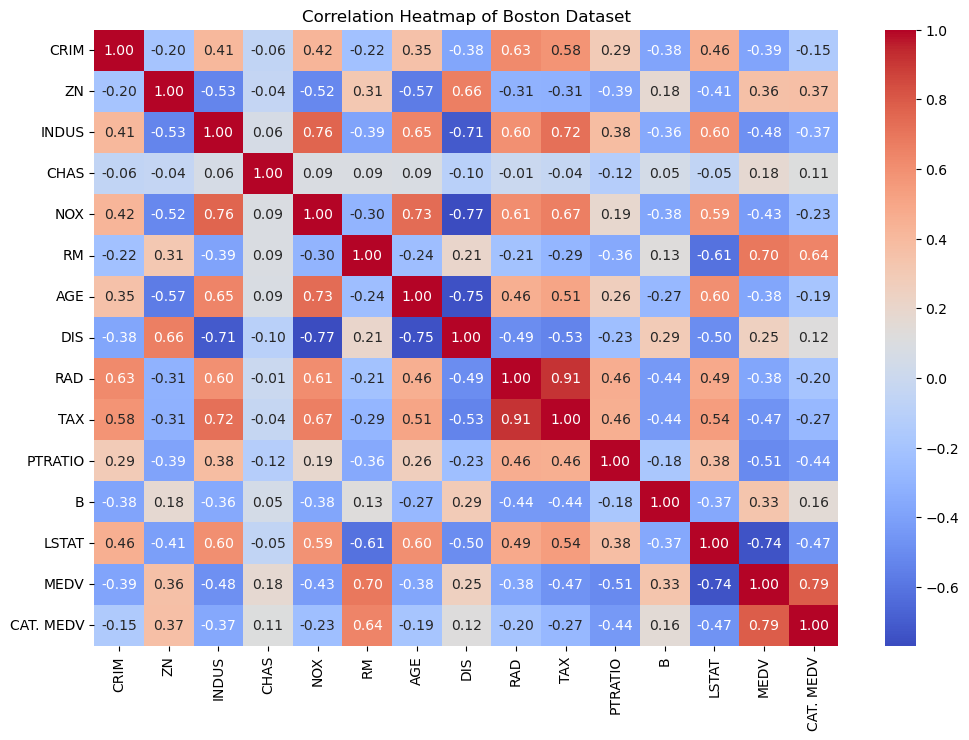

In [87]:
# 2) 히트맵 그리기
plt.figure(figsize=(12, 8))  # 히트맵의 크기 설정
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")  # annot=True로 각 셀에 값 표시
plt.title('Correlation Heatmap of Boston Dataset')  # 제목 추가
plt.show()

### Q3 다음과 같은 단순회귀분석 모형을 Training Set과 Test Set을 통해 구현하라.
* 모집단의 하위계층의 비율(LSTAT)이 독립변수
* 본인 소유의 주택가격(중앙값)인 MEDV가 종속변수
* Training set이 표본의 75%를 차지한다.
* Training Set에대해서는 회귀 분석 추정 계수 및 R2 값 mean squared error 값을 보고한다.
* Training Set에대해서는 회귀 분석 추정 계수 값을 바탕으로 Test Set에서 예측한 후 mean squared error 값을 보고한다.

In [89]:
X = boston_df[['LSTAT']] # 전체 데이터프레임 중 한 칼럼만 가져오기
y = boston_df['MEDV']
y # y는 값만을 나타냄

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 13)

In [101]:
model = LinearRegression()
model.fit(X_train, y_train)

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values